<a href="https://colab.research.google.com/github/Ikenna1011/AAI-521_FinalProject/blob/main/AAI_510_Final_Project_Section2023_Team_JO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# To Do: Problem statement and justification for the proposed approach.

Write..

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
! ls

gdrive	sample_data


In [ ]:
%cd gdrive/MyDrive/AAI-510/Project

/content/gdrive/MyDrive/AAI-510/Project


## Data understanding (EDA) – a graphical and non-graphical representation of relationships between the response variable and predictor variables.

In [ ]:
# Import the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
import numpy as np
import pandas as pd
import os
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix,r2_score
from sklearn import model_selection
from sklearn.ensemble import BaggingClassifier
import warnings
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
warnings.filterwarnings('ignore')

In [ ]:
# Load the dataset
df = pd.read_csv("bank-additional-full.csv", sep = ';')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


## Explore the dataset

In [ ]:
# Explore the dataset
print(df.head())  # View the first few rows of the dataset
print(df.info())  # Get an overview of the dataset

   age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed

In [ ]:
# Check for categorical variables

for column in df.columns:
    print()
    if df[column].dtype == 'object':
        unique_values = df[column].unique()
        print(f'Column name: {column}, Unique values: {unique_values}')



Column name: job, Unique values: ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']

Column name: marital, Unique values: ['married' 'single' 'divorced' 'unknown']

Column name: education, Unique values: ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']

Column name: default, Unique values: ['no' 'unknown' 'yes']

Column name: housing, Unique values: ['no' 'yes' 'unknown']

Column name: loan, Unique values: ['no' 'yes' 'unknown']

Column name: contact, Unique values: ['telephone' 'cellular']

Column name: month, Unique values: ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']

Column name: day_of_week, Unique values: ['mon' 'tue' 'wed' 'thu' 'fri']





Column name: poutcome, Unique values: ['nonexistent' 'failure' 'success']






Column name: y, Unique values: ['no' 'yes']


In [ ]:
# Get descriptive statistics of numerical columns
print(df.describe())

               age      duration      campaign         pdays      previous  \
count  41188.00000  41188.000000  41188.000000  41188.000000  41188.000000   
mean      40.02406    258.285010      2.567593    962.475454      0.172963   
std       10.42125    259.279249      2.770014    186.910907      0.494901   
min       17.00000      0.000000      1.000000      0.000000      0.000000   
25%       32.00000    102.000000      1.000000    999.000000      0.000000   
50%       38.00000    180.000000      2.000000    999.000000      0.000000   
75%       47.00000    319.000000      3.000000    999.000000      0.000000   
max       98.00000   4918.000000     56.000000    999.000000      7.000000   

       emp.var.rate  cons.price.idx  cons.conf.idx     euribor3m   nr.employed  
count  41188.000000    41188.000000   41188.000000  41188.000000  41188.000000  
mean       0.081886       93.575664     -40.502600      3.621291   5167.035911  
std        1.570960        0.578840       4.628198    

In [ ]:
# Check the distribution of the target variable
print(df["y"].value_counts())

no     36548
yes     4640
Name: y, dtype: int64


### Perform data visualization

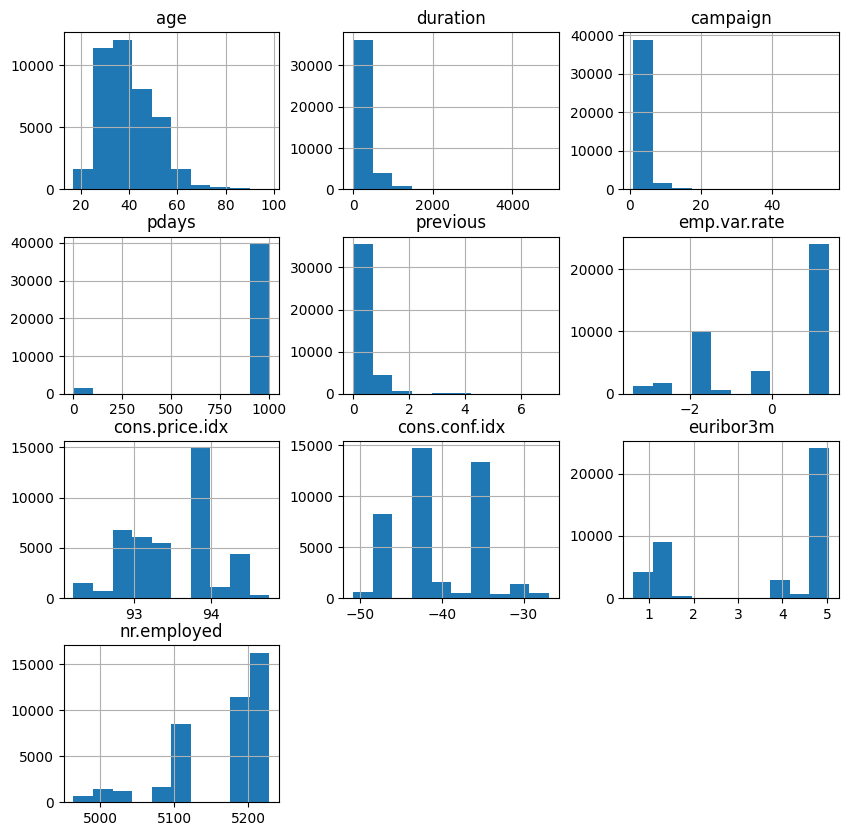

In [ ]:
# Plot a histogram of the numerical features
df.hist(figsize=(10, 10))
plt.show()

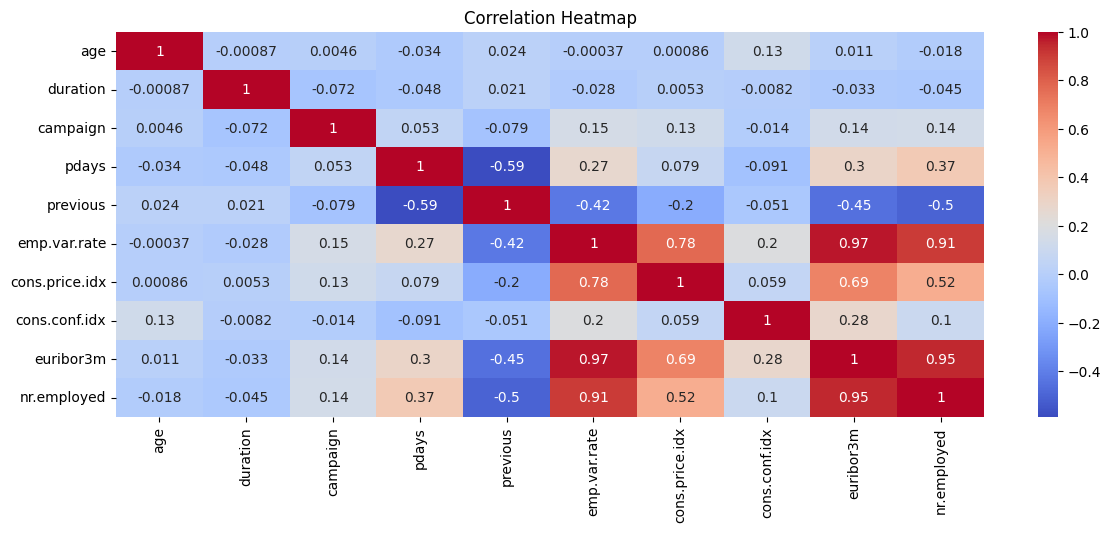

In [ ]:
# Visualize the correlation between numerical features using a heatmap
plt.figure(figsize = (14, 5))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

To enhance our understanding, we shall illustrate the data correlation for a correlation coefficient of at least 0.75.

In [ ]:
# Calculate the correlation matrix and select correlations greater than or equal to 0.75

correlation = df.corr()
strong_correlation = correlation[correlation >= 0.75]
strong_correlation

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
age,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
duration,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
campaign,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pdays,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
previous,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
emp.var.rate,NaN,NaN,NaN,NaN,NaN,1.000000,0.775334,NaN,0.972245,0.906970
cons.price.idx,NaN,NaN,NaN,NaN,NaN,0.775334,1.000000,NaN,NaN,NaN
cons.conf.idx,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
euribor3m,NaN,NaN,NaN,NaN,NaN,0.972245,NaN,NaN,1.000000,0.945154
nr.employed,NaN,NaN,NaN,NaN,NaN,0.906970,NaN,NaN,0.945154,1.000000


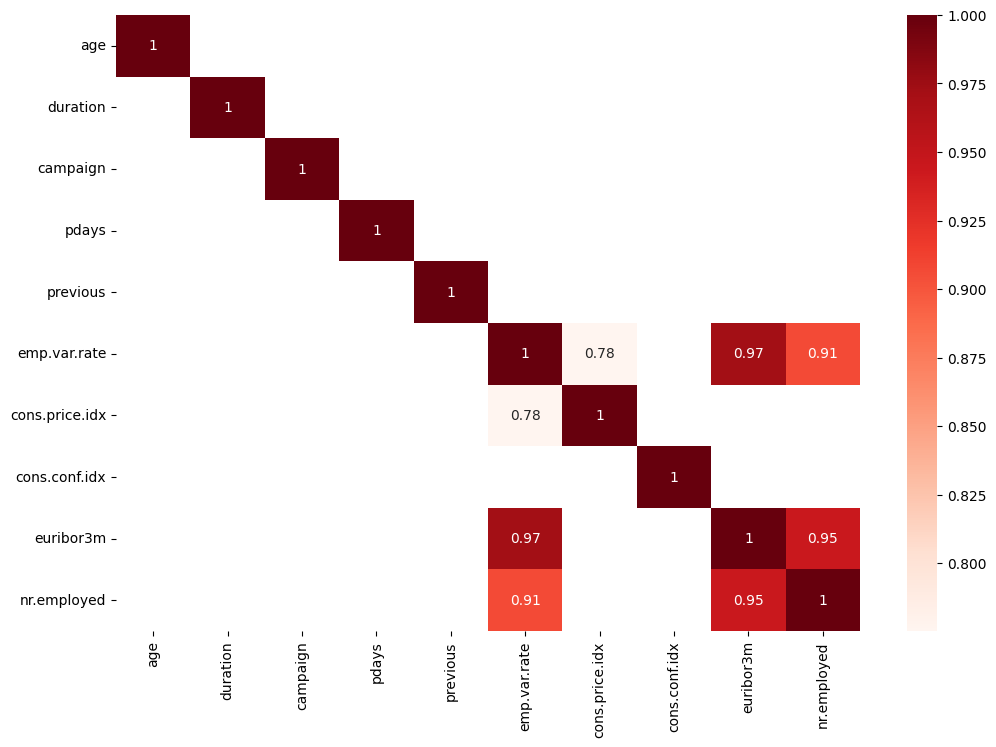

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(strong_correlation, cmap="Reds", annot = True);

* The features with the highest correlations are evident from the analysis. The most prominent relationship is 0.97 between "euribor3m" and "emp.var.rate". There is also some correlation between emp.var.rate and "nr.employed". These correlated data will not be removed at this stage, as the main focus will be on tree models that do not need much preprocessing.


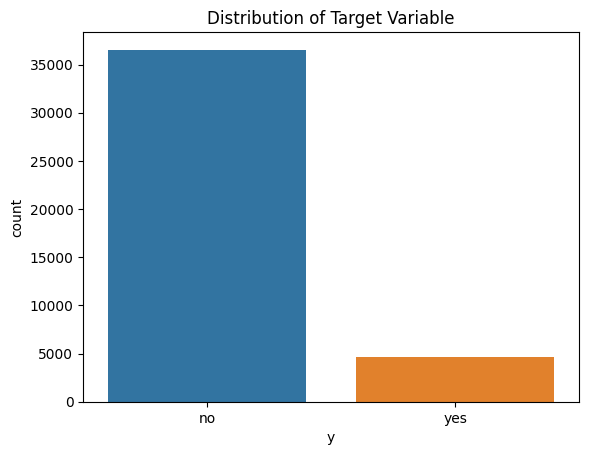

In [ ]:
# Plot the distribution of the target variable
sns.countplot(data=df, x="y")
plt.title("Distribution of Target Variable")
plt.show()

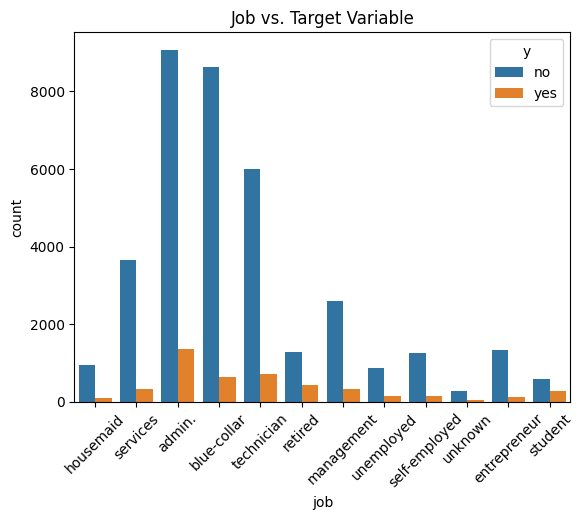

In [ ]:
# Explore relationships between categorical and target variable
sns.countplot(data=df, x="job", hue="y")
plt.title("Job vs. Target Variable")
plt.xticks(rotation=45)
plt.show()

These are just a few examples of EDA on the bank marketing dataset to understand the data. We'll further explore relationships between different features, conduct feature engineering, handle missing values or outliers, and perform other analyses based on our project's objectives and requirements.

### Data preparation functions

In [ ]:
# Utility functions to explore the data and build predictive models

def return_categorical_variables(df):
    """
    This function returns categorical variables in the dataframe.
    """
    categorical_columns = [column_name for column_name in df if df[column_name].dtype == 'O']
    return categorical_columns

def return_numerical_variables(df):
    """
    This function returns numerical variables in the dataframe.
    """
    return list(set(df.columns) - set(return_categorical_variables(df)))


def plot_variable_distributions(df):
    """
    This function plots the distribution of numerical variables in the dataframe.
    """
    fig, axes = plt.subplots(1, len(return_numerical_variables(df)), figsize=(70, 10))

    for i, numeric_column_name in enumerate(list(set(df.columns) - set(return_categorical_variables(df)))):
        sns.distplot(df[numeric_column_name], ax=axes[i])
        plt.title(f'Distribution of {numeric_column_name}')

def evaluate_classifier(clf, x_train, x_test, y_train, y_test):
    """
    This function evaluates a classifier by calculating accuracy, ROC, F-score, precision, and recall.
    """
    y_test_pred = clf.predict(x_test)
    y_train_pred = clf.predict(x_train)

    accuracy_test = accuracy_score(y_test, y_test_pred)
    accuracy_train = accuracy_score(y_train, y_train_pred)

    roc_test = roc_auc_score(y_test, y_test_pred, multi_class='ovr')
    roc_train = roc_auc_score(y_train, y_train_pred, multi_class='ovr')

    print('Train accuracy:', accuracy_train)
    print('Test accuracy:', accuracy_test)
    print()
    print('Train ROC:', roc_train)
    print('Test ROC:', roc_test)

    f1 = f1_score(y_test, y_test_pred)
    precision = precision_score(y_test, y_test_pred)
    recall = recall_score(y_test, y_test_pred)
    print()
    print("F-score:", f1)
    print("Precision:", precision)
    print("Recall:", recall)


# def perform_random_search(clf, params, x_train, x_test, y_train, y_test):
#     """
#     This function performs a random search for hyperparameter tuning and evaluates the best model.
#     """
#     random_search = RandomizedSearchCV(estimator=clf, param_distributions=params, scoring='roc_auc', cv=5)
#     random_search.fit(x_train, y_train)
#     optimal_model = random_search.best_estimator_

#     print("Best parameters:", random_search.best_params_)
#     print()
#     print("Best estimator:", random_search.best_estimator_)
#     print()
#     print('Scores and accuracies:')
#     print()
#     evaluate_classifier(optimal_model, x_train, x_test, y_train, y_test)

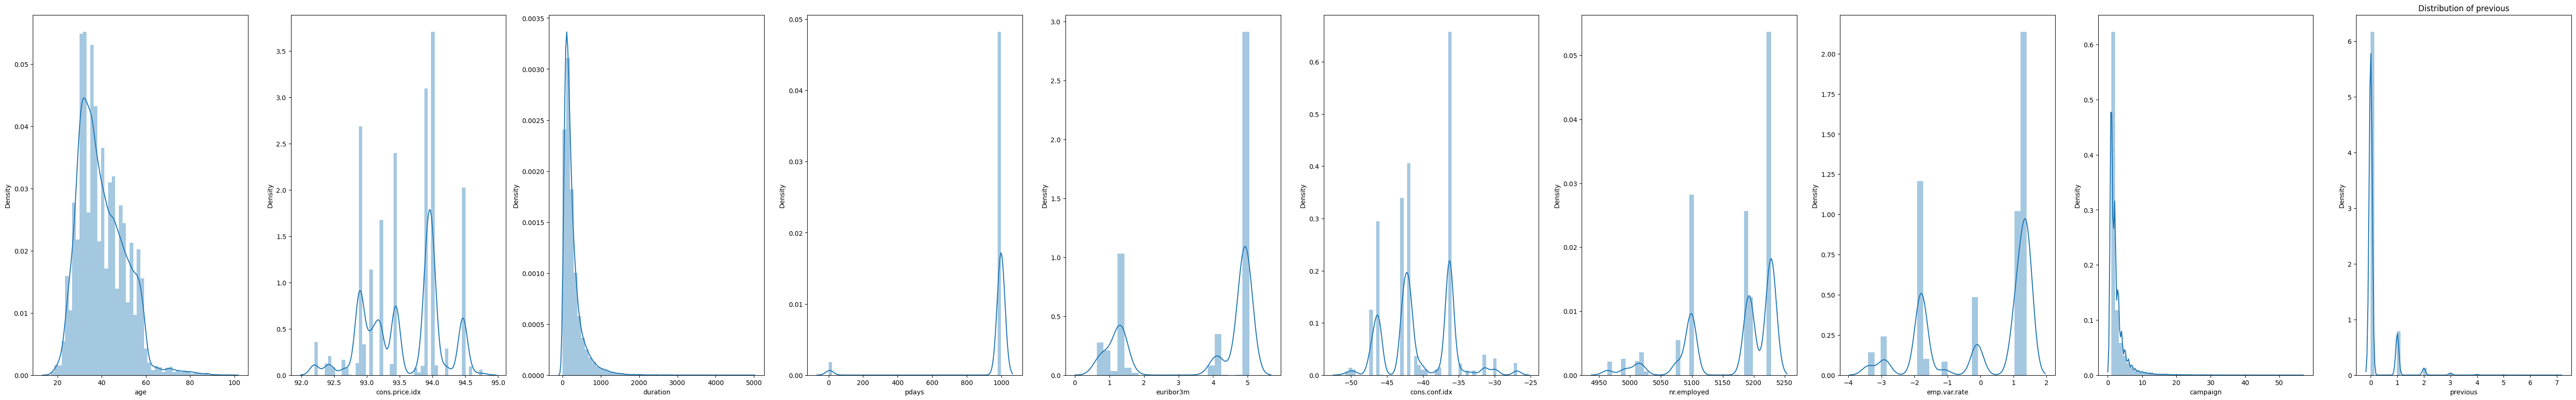

In [ ]:
# Checking the distribution for continuous variables

plot_variable_distributions(df)

* These plots don't appear to be normally distributed; they skew to the right with a long tail. This suggests that there may be some outliers or extreme values in the data. Further investigation and analysis are needed to determine the cause of this skewness and its impact on any statistical tests or models that may be applied.

### View Categorical Features

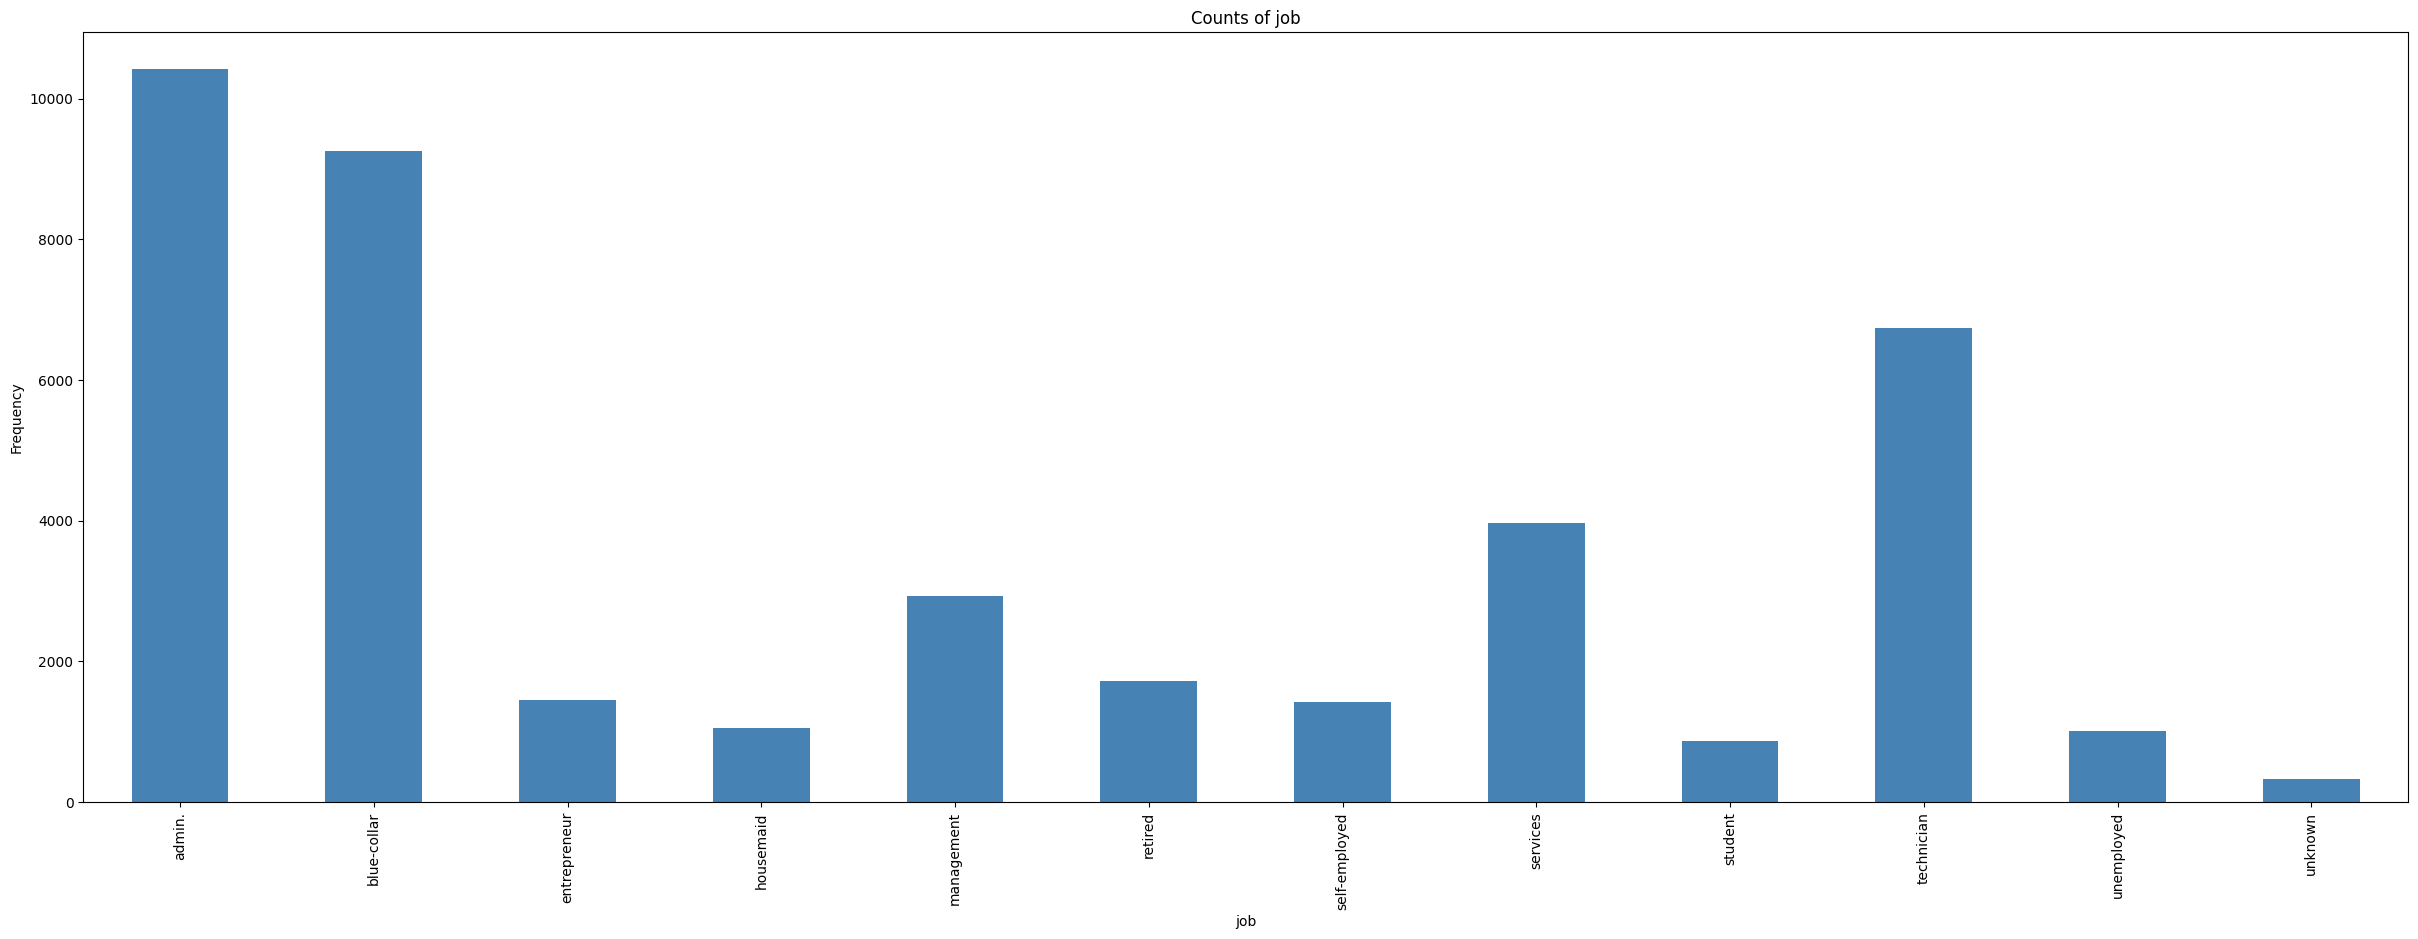

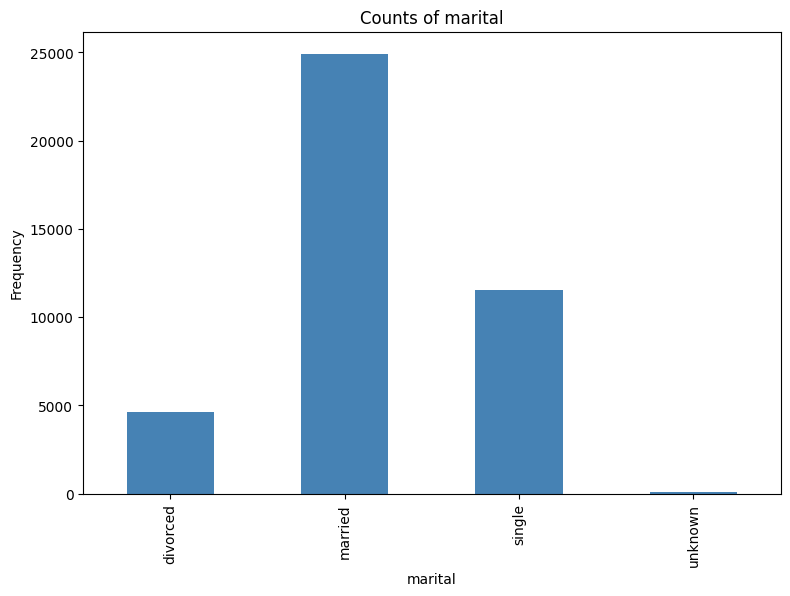

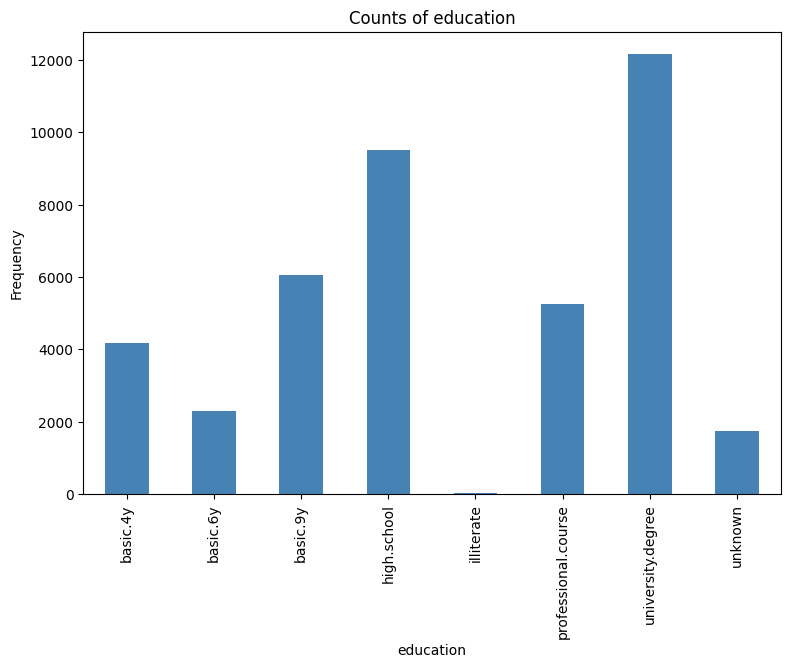

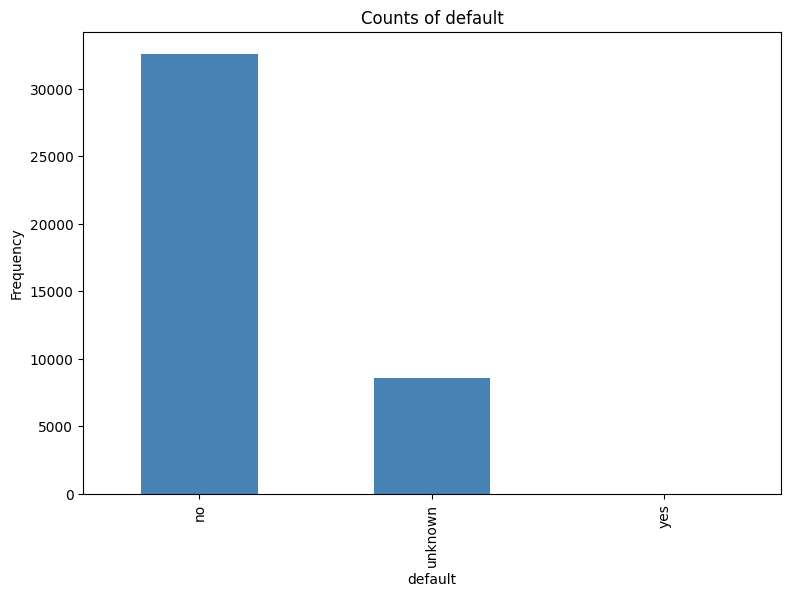

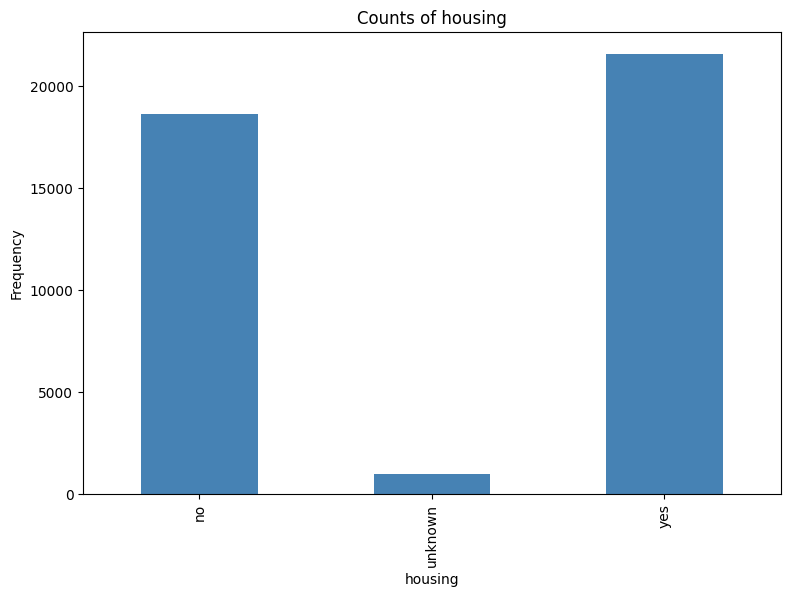

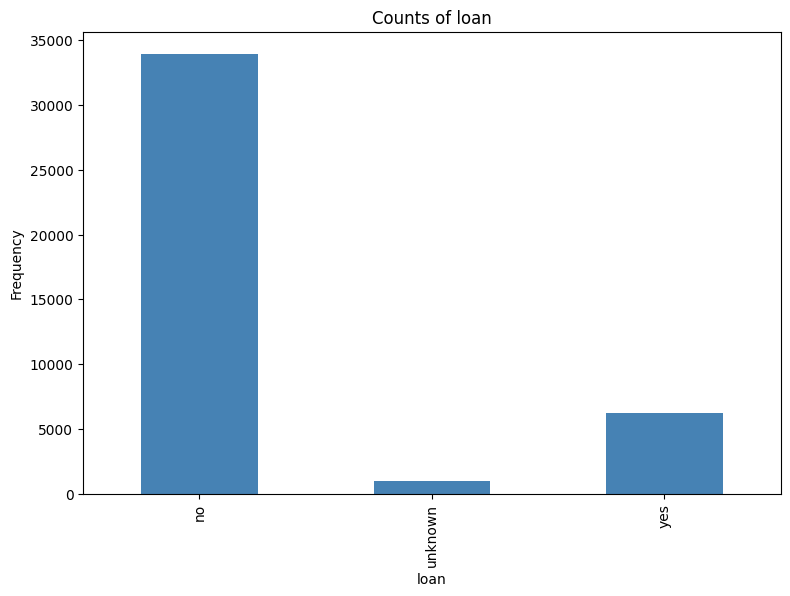

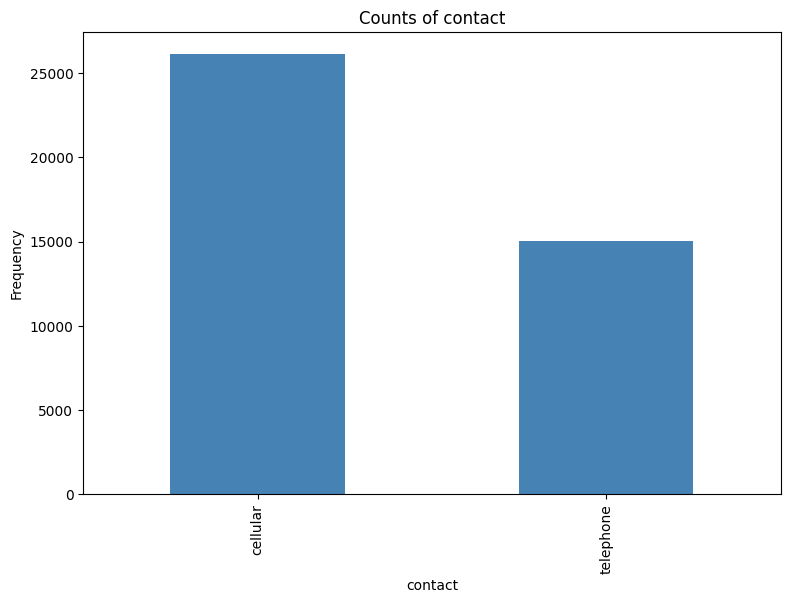

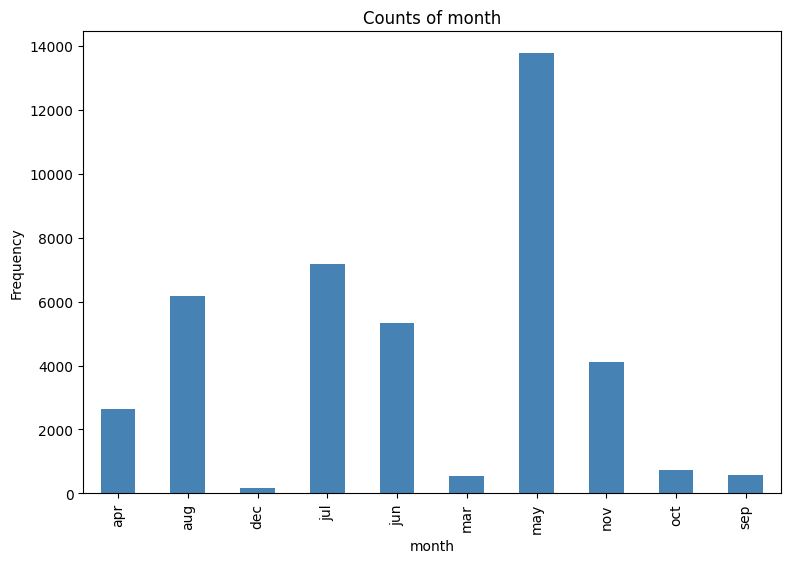

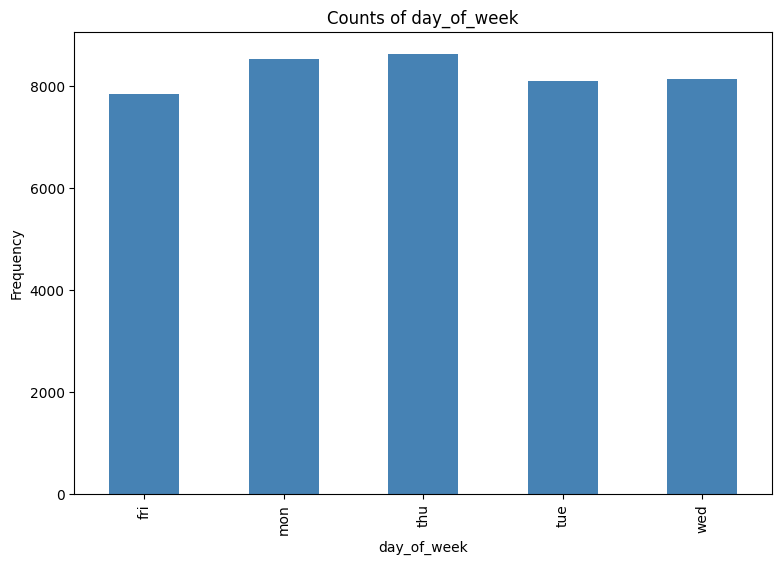

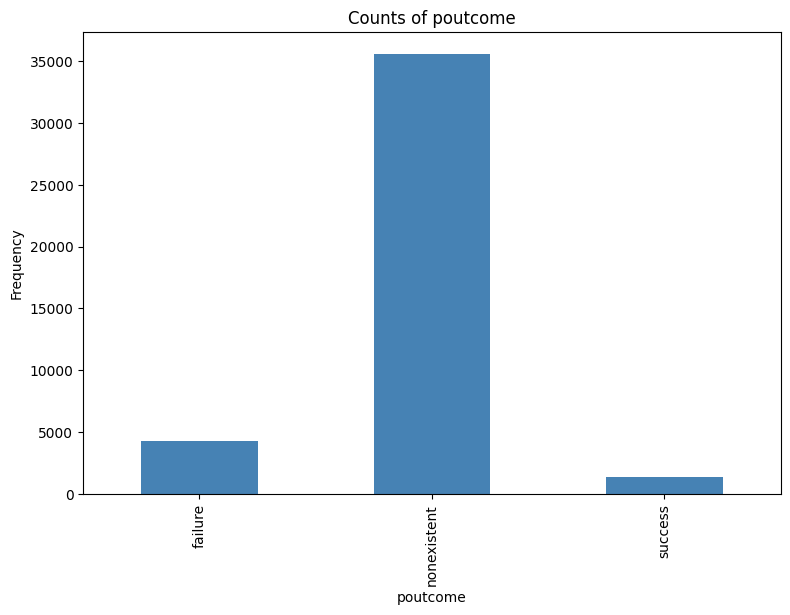

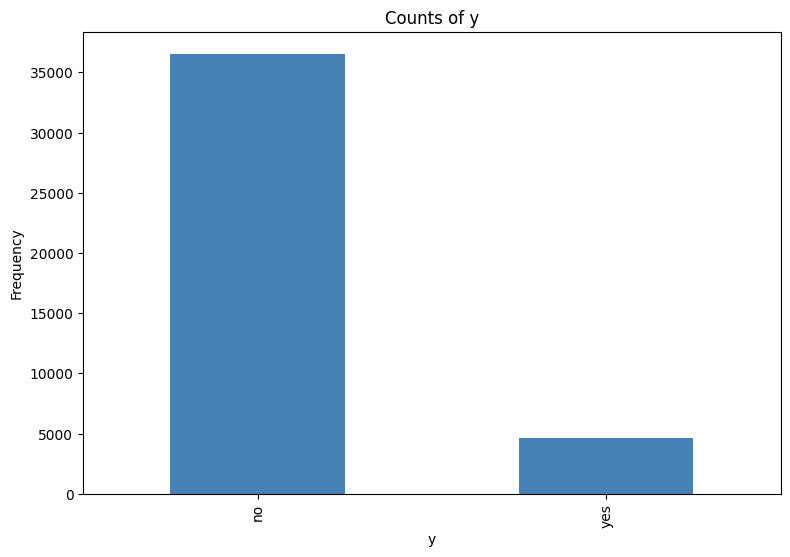

In [ ]:
# Generating graphical representations for each column with discrete values
for column in return_categorical_variables(df):
    value_counts = df[column].value_counts().sort_index()
    if len(value_counts) > 10:
        fig = plt.figure(figsize=(30, 10))
    else:
        fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    value_counts.plot.bar(ax=ax, color='steelblue')
    ax.set_title(f"Counts of {column}")
    ax.set_xlabel(column)
    ax.set_ylabel("Frequency")
plt.show()

Let's check the data distribution in Pdays column. Pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

In [ ]:
df['pdays'].unique()

array([999,   6,   4,   3,   5,   1,   0,  10,   7,   8,   9,  11,   2,
        12,  13,  14,  15,  16,  21,  17,  18,  22,  25,  26,  19,  27,
        20])

Now we see that there's an instance of 999, which says that the client was not contacted. We can easily drop the row containing the 999 data, but what we will do instead is assign a lesser weight to 999.

### Feature Importance

In [ ]:
# Let's adjust the columns by giving them relevance-based weights

job_weights = {'unknown': -1, 'unemployed': -1, 'entrepreneur': 15, 'blue-collar': 8,
               'technician': 6, 'services': 6, 'admin.': 6, 'management': 6,
               'self-employed': 4, 'student': 4, 'housemaid': 2, 'retired': 2}

housing_mapping = {'no': 0, 'yes': 1}
loan_mapping = {'no': 0, 'yes': 1}
y_mapping = {'no': 0, 'yes': 1}
default_mapping = {'no': 0, 'yes': 1}
poutcome_mapping = {'failure': 0, 'success': 2}

df['job'] = df['job'].map(job_weights)
df['housing'] = df['housing'].map(housing_mapping)
df['loan'] = df['loan'].map(loan_mapping)
df['y'] = df['y'].map(y_mapping)
df['default'] = df['default'].map(default_mapping)
df['poutcome'] = df['poutcome'].map(poutcome_mapping)
df['pdays'] = df['pdays'].apply(lambda x: 0 if x == 999 else (20 if x <= 10 else (6 if x <= 20 else 3)))

* The code assigns weights or mapping values based on importance or specific conditions for each column. Keep in mind that for each 999, the Pday will receive a value of zero.

#### Dropping Columns with Lower Predictive Importance

Based on the provided description of these features, it might be best to discard them.

* Contact: contact communication type (categorical:
'cellular','telephone')
* Month: last contact month of year (categorical: 'jan', 'feb', 'mar',
…, 'nov', 'dec')
* Day_of_week: last contact day of the week (categorical:
'mon','tue','wed','thu','fri')

In [ ]:
# Drop the columns 'day_of_week', 'contact', and 'month' from the DataFrame 'df' using the drop() function.

df.drop(['day_of_week', 'contact', 'month'], axis=1, inplace = True)

In [ ]:
# Encode the remaining attributes using one hot encoding.

df  = pd.get_dummies(df, drop_first = True)

## Using SMOTE to achieve data balance

Before using SMOTE, it is important to check for any missing values in the data. If there are any, we will handle them by using mean imputation.

Earlier, we did say that the distribution of the dataset needs to be balanced. We must balance it before feeding it into our model to prevent bias. This can be done through techniques such as oversampling or undersampling. Oversampling involves increasing the number of instances in the minority class, while undersampling involves reducing the number of instances in the majority class. Both techniques have their advantages and disadvantages, and the choice depends on the specific dataset and problem at hand.

The code below uses SMOTE (Synthetic Minority Over-sampling Technique) to balance the dataset by oversampling the minority class. The resampled dataset's shape is printed to compare it with the original dataset shape.


### Dealing with missing values:

The SimpleImputer from scikit-learn is used to fill in the missing values in 'x_train' with the mean value of each column. The imputed data, x_train_imputed, is then used for the SMOTE resampling. This ensures that there are no missing values in 'x_train' when performing the resampling.

### Check for missing data

In [ ]:
# Function to calculate missing values by column
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()

        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)

        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)

        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})

        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)

        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")

        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [ ]:
# Missing values statistics
missing_values = missing_values_table(df)
missing_values.head(20)

Your selected dataframe has 26 columns.
There are 4 columns that have missing values.


,Missing Values,% of Total Values
poutcome,35563,86.3
default,8597,20.9
housing,990,2.4
loan,990,2.4


In [ ]:
# Helper function to quickly analyze data. For future reference

# import pandas as pd
# from sklearn.model_selection import train_test_split
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.metrics import classification_report, confusion_matrix
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Load your DataFrame 'df' with the appropriate data

# # Check if the column 'y' exists in the DataFrame
# if 'y' in df.columns:
#     # Split the data into features (X) and target variable (y)
#     X = df.drop("y", axis=1)
#     y = df["y"]

#     # Split the data into training and testing sets
#     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#     # Create and train a Decision Tree classifier
#     clf = DecisionTreeClassifier()
#     clf.fit(X_train, y_train)

#     # Make predictions on the test set
#     y_test_pred = clf.predict(X_test)

#     # Print the classification report for the loaded model
#     classification_report = classification_report(y_test, y_test_pred)
#     print("Classification Report:")
#     print(classification_report)

#     # Plot the confusion matrix for the loaded model
#     confusion_matrix = confusion_matrix(y_test, y_test_pred)
#     plt.figure(figsize=(8, 6))
#     sns.heatmap(confusion_matrix, annot=True, cmap="Blues")
#     plt.title("Confusion Matrix")
#     plt.xlabel("Predicted Labels")
#     plt.ylabel("True Labels")
#     plt.show()

# else:
#     print("Column 'y' not found in the DataFrame. Please check the column name.")

In [ ]:
# Split the processed data into separate training and test sets

x = df.drop("y", axis=1)
y = df['y']
x.sample()

x_train,x_test,y_train,y_test = train_test_split(x,y, random_state=42)

In [ ]:
# Handle class imbalance using SMOTE

smote = SMOTE()

# Create an imputer object with mean strategy
imputer = SimpleImputer(strategy='mean')

# Fit and transform the imputer on x_train, x_smote, and x_test
x_train_imputed = imputer.fit_transform(x_train)

# Resample using SMOTE on the imputed data
x_smote, y_smote = smote.fit_resample(x_train_imputed, y_train)

# Fit and transform the imputer on x_smote_imputed, and x_test_imputed
x_smote_imputed = imputer.transform(x_smote)
x_test_imputed = imputer.transform(x_test)

print('Original dataset shape:', len(x_train))
print('Resampled dataset shape:', len(x_smote))

Original dataset shape: 30891
Resampled dataset shape: 54808


In [ ]:
# Scale the numerical features

# Create a StandardScaler object
scaler = StandardScaler()

# Fit and transform the scaler on the imputed data
x_train_scaled = scaler.fit_transform(x_train_imputed)
x_smote_scaled = scaler.transform(x_smote_imputed)
x_test_scaled = scaler.transform(x_test_imputed)

## Model Development


### KNN

Build and evaluate the K-Nearest Neighbors classifier.

In [ ]:
# Perform classification using KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=20)
knn.fit(x_train_scaled, y_train)

# Evaluate the classifier
evaluate_classifier(knn, x_smote_scaled, x_test_scaled, y_smote, y_test)

Train accuracy: 0.6577689388410451
Test accuracy: 0.904923764203166

Train ROC: 0.6577689388410451
Test ROC: 0.6383644666923141

F-score: 0.40988547317661245
Precision: 0.6719367588932806
Recall: 0.2948829141370338


The KNN model did not perform well; therefore, we would adjust its hyperparameters in an effort to enhance its performance. So like before, the missing values in x_train and x_test are handled using the SimpleImputer with a mean strategy. The imputed data is then scaled using the StandardScaler. Finally, the KNN classifier is trained, and error rates and accuracies are computed and plotted.

Minimum error:- 0.09391084781975333 at K = 18


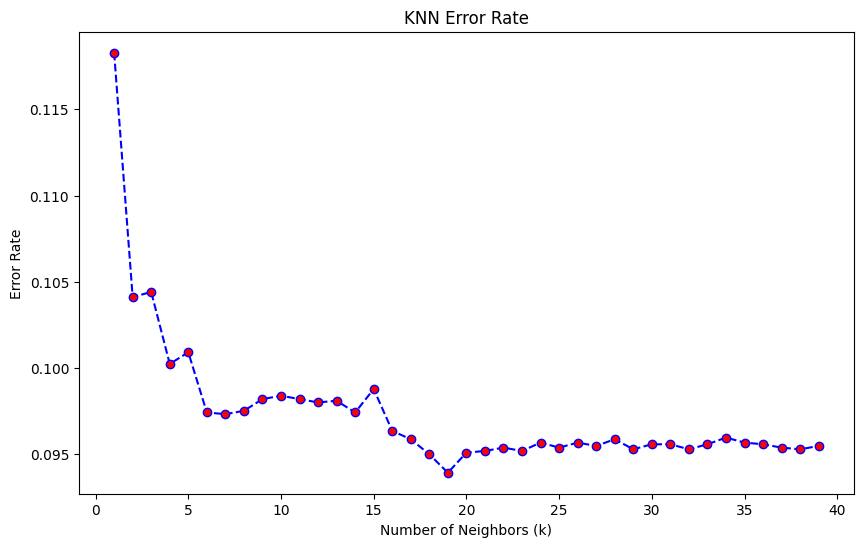

Maximum accuracy:- 0.9060891521802467 at K = 18


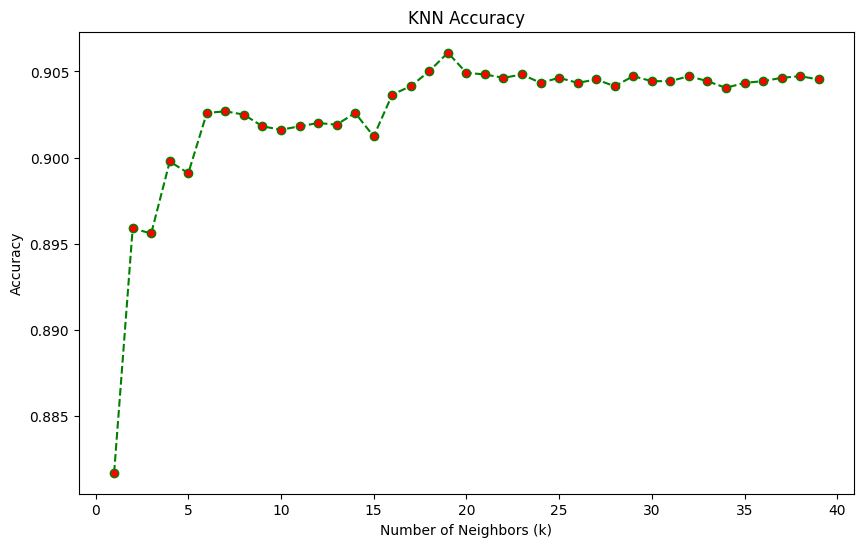

In [ ]:
# Find the best value of k

# Create a SimpleImputer object with mean strategy
imputer = SimpleImputer(strategy='mean')

# Fit and transform the imputer on the training data
x_train_imputed = imputer.fit_transform(x_train)
x_test_imputed = imputer.transform(x_test)

# Create a StandardScaler object
scaler = StandardScaler()

# Fit and transform the scaler on the imputed data
x_train_scaled = scaler.fit_transform(x_train_imputed)
x_test_scaled = scaler.transform(x_test_imputed)

# Hyperparameter tuning for KNN
error_rate = []
acc = []

for i in range(1, 40):
    # Train the KNN classifier
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train_scaled, y_train)

    # Predict on the test set
    pred_i = knn.predict(x_test_scaled)
    yhat = knn.predict(x_test_scaled)

    # Compute error rate and accuracy
    error_rate.append(np.mean(pred_i != y_test))
    acc.append(metrics.accuracy_score(y_test, yhat))

# Plot the error rate and accuracy
plt.figure(figsize=(10, 6))
plt.plot(range(1, 40), error_rate, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=6)
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Error Rate')
plt.title('KNN Error Rate')
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate)))
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(range(1, 40), acc, color='green', linestyle='dashed', marker='o', markerfacecolor='red', markersize=6)
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('KNN Accuracy')
print("Maximum accuracy:-",max(acc),"at K =",acc.index(max(acc)))
plt.show()

We have just minimized the error by modeling with different values of K and found K = 18. This new K will help us remodel our data and recalculate the scores.

In [ ]:
# Model with k = 18

# Create a SimpleImputer object with mean strategy
imputer = SimpleImputer(strategy='mean')

# Fit and transform the imputer on the SMOTE data
x_smote_imputed = imputer.fit_transform(x_smote)
x_test_imputed = imputer.transform(x_test)

# Create a StandardScaler object
scaler = StandardScaler()

# Fit and transform the scaler on the imputed SMOTE data
x_smote_scaled = scaler.fit_transform(x_smote_imputed)
x_test_scaled = scaler.transform(x_test_imputed)

# Train the KNN classifier on the scaled and imputed SMOTE data
knn = KNeighborsClassifier(n_neighbors=18)
knn.fit(x_smote_scaled, y_smote)

# Evaluate the trained classifier on the scaled and imputed test data
evaluate_classifier(knn, x_smote_scaled, x_test_scaled, y_smote, y_test)

Train accuracy: 0.9129506641366224
Test accuracy: 0.875206370787608

Train ROC: 0.9129506641366224
Test ROC: 0.7974745784704058

F-score: 0.555824403733149
Precision: 0.46206896551724136
Recall: 0.6973113616652211


### KNN Bagging Model

Now let's see how the model will perform if we bag with KNN as the base model. Like before, we will first deal with the NaN values using the SimpleImputer before fitting the BaggingClassifier.

In [ ]:
# Create a SimpleImputer object with mean strategy
imputer = SimpleImputer(strategy='mean')

# Fit and transform the imputer on the SMOTE data
x_smote_imputed = imputer.fit_transform(x_smote)
x_test_imputed = imputer.transform(x_test)

# Create a StandardScaler object
scaler = StandardScaler()

# Fit and transform the scaler on the imputed SMOTE data
x_smote_scaled = scaler.fit_transform(x_smote_imputed)
x_test_scaled = scaler.transform(x_test_imputed)

# Create a BaggingClassifier with KNN as the base estimator
model = BaggingClassifier(base_estimator=KNeighborsClassifier(n_neighbors=18), n_estimators=15)

# Train the BaggingClassifier on the scaled and imputed SMOTE data
model.fit(x_smote_scaled, y_smote)

# Evaluate the trained classifier on the scaled and imputed test data
evaluate_classifier(model, x_smote_scaled, x_test_scaled, y_smote, y_test)

Train accuracy: 0.915030652459495
Test accuracy: 0.8716130911916092

Train ROC: 0.915030652459495
Test ROC: 0.8037887488153314

F-score: 0.5554808338937457
Precision: 0.45359692476661173
Recall: 0.7163920208152645


The ROC scores and accuracy scores for the train and test data show a noticeable difference. Therefore, it may also be worth exploring other machine learning algorithms to see if they can better capture the underlying patterns in the data.

### Decision Tree

Furthermore, it is imperative that we develop a decision tree classifier to evaluate its performance against the KNN. It is impractical to ascertain its effectiveness without building the model beforehand.

In [ ]:
# Create a SimpleImputer object with mean strategy
imputer = SimpleImputer(strategy='mean')

# Fit and transform the imputer on the training data
x_train_imputed = imputer.fit_transform(x_train)
x_test_imputed = imputer.transform(x_test)

# Create a DecisionTreeClassifier
dtree = DecisionTreeClassifier(random_state=0)

# Fit the DecisionTreeClassifier on the imputed training data
dtree.fit(x_train_imputed, y_train)

# Evaluate the trained classifier on the training and test data
evaluate_classifier(dtree, x_train_imputed, x_test_imputed, y_train, y_test)

Train accuracy: 1.0
Test accuracy: 0.8879285228707391

Train ROC: 1.0
Test ROC: 0.7261908149382454

F-score: 0.508517887563884
Precision: 0.499581589958159
Recall: 0.5177797051170858


Based on the current performance of the decision tree model on the testing data, it appears that tuning the hyperparameters of the decision tree could be a viable solution.

Let's first handle the missing values in x_train and x_test using the SimpleImputer with a mean strategy. The imputed data is then used to perform the randomized search with RandomizedSearchCV and fit the DecisionTreeClassifier. Finally, the best estimator is obtained using random_search.best_estimator_, and the results are printed using the classifier function.

### Decision Tree Hyperparameter Tuning

In [ ]:
# Perform hyperparameter tuning for the Decision Tree classifier

# Define the parameter grid
param_grid = {
    'max_depth': np.arange(3, 20),
    'min_samples_split': np.arange(3, 20, 1),
    'min_samples_leaf': np.arange(3, 30),
    'criterion': ['gini', 'entropy']
}

# Create a SimpleImputer object with mean strategy
imputer = SimpleImputer(strategy='mean')

# Fit and transform the imputer on the training data
x_train_imputed = imputer.fit_transform(x_train)
x_test_imputed = imputer.transform(x_test)

# Perform randomized search with DecisionTreeClassifier
random_search = RandomizedSearchCV(estimator=DecisionTreeClassifier(random_state=0), param_distributions=param_grid, scoring='roc_auc', cv=5)
random_search.fit(x_train_imputed, y_train)

# Get the best estimator and print the results
optimal_model = random_search.best_estimator_
print("Best parameters are:", random_search.best_params_)
print()
print("Best estimator is:", random_search.best_estimator_)
print()
print("Scores and accuracies are:")
print()
evaluate_classifier(optimal_model, x_train_imputed, x_test_imputed, y_train, y_test)

Best parameters are: {'min_samples_split': 17, 'min_samples_leaf': 29, 'max_depth': 7, 'criterion': 'entropy'}

Best estimator is: DecisionTreeClassifier(criterion='entropy', max_depth=7, min_samples_leaf=29,
                       min_samples_split=17, random_state=0)

Scores and accuracies are:

Train accuracy: 0.919523485804927
Test accuracy: 0.915897834320676

Train ROC: 0.7723065271483794
Test ROC: 0.7631612044808362

F-score: 0.6012891344383057
Precision: 0.6408243375858685
Recall: 0.5663486556808326


The results look really good. However, like before, let's build a decision tree-based bagging model to see how it compares with our KNN model.

To build the decision tree bagging model, we set up KFold cross-validation with n_splits=3 using model_selection.KFold. Then, we define the base estimator with tuned hyperparameters using DecisionTreeClassifier. Finally, we create the BaggingClassifier with the tuned hyperparameters and fit it to the training data. The results are printed using the classifier function.

### Feature Importance in the Decision Tree Model

The code below prints the best parameters found during hyperparameter tuning for the Decision Tree classifier. It performs feature importance analysis using the best Decision Tree model and visualizes the importance of each feature. The code saves the best Decision Tree classifier using the pickle module and demonstrates how to load and use the saved model to make predictions. Finally, it evaluates the loaded model using various performance metrics such as accuracy, ROC AUC, F1 score, precision, and recall.

Best parameters: {'min_samples_split': 17, 'min_samples_leaf': 29, 'max_depth': 7, 'criterion': 'entropy'}


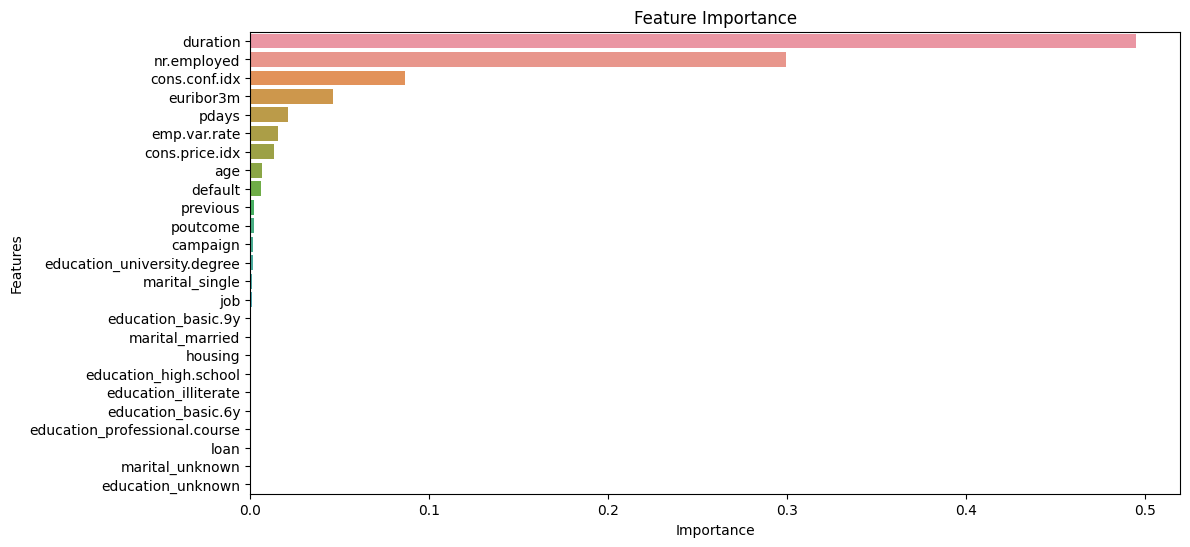

Loaded Decision Tree Model:
Accuracy: 0.915897834320676
ROC AUC: 0.7631612044808362
F1 score: 0.6012891344383057
Precision: 0.6408243375858685
Recall: 0.5663486556808326


In [ ]:
# Print the best parameters found during hyperparameter tuning
print("Best parameters:", random_search.best_params_)

# Feature importance analysis
feature_importance = optimal_model.feature_importances_
feature_names = x.columns
sorted_indices = np.argsort(feature_importance)[::-1]
sorted_feature_names = feature_names[sorted_indices]
sorted_feature_importance = feature_importance[sorted_indices]

# Plot the feature importance
plt.figure(figsize=(12, 6))
sns.barplot(x=sorted_feature_importance, y=sorted_feature_names, orient='h')
plt.title("Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()

# Save the best Decision Tree classifier
import pickle
with open("optimal_model.pickle", "wb") as f:
    pickle.dump(optimal_model, f)

# Load the saved Decision Tree classifier
with open("optimal_model.pickle", "rb") as f:
    loaded_decision_tree = pickle.load(f)

# Create a SimpleImputer object with mean strategy
imputer = SimpleImputer(strategy='mean')

# Fit and transform the imputer on the training data
x_train_imputed = imputer.fit_transform(x_train)
x_test_imputed = imputer.transform(x_test)

# Make predictions using the loaded model
y_test_pred = loaded_decision_tree.predict(x_test_imputed)

# Evaluate the loaded model
accuracy = accuracy_score(y_test, y_test_pred)
roc_auc = roc_auc_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)

print('Loaded Decision Tree Model:')
print('Accuracy:', accuracy)
print('ROC AUC:', roc_auc)
print('F1 score:', f1)
print('Precision:', precision)
print('Recall:', recall)

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.96      0.95      9144
           1       0.64      0.57      0.60      1153

    accuracy                           0.92     10297
   macro avg       0.79      0.76      0.78     10297
weighted avg       0.91      0.92      0.91     10297



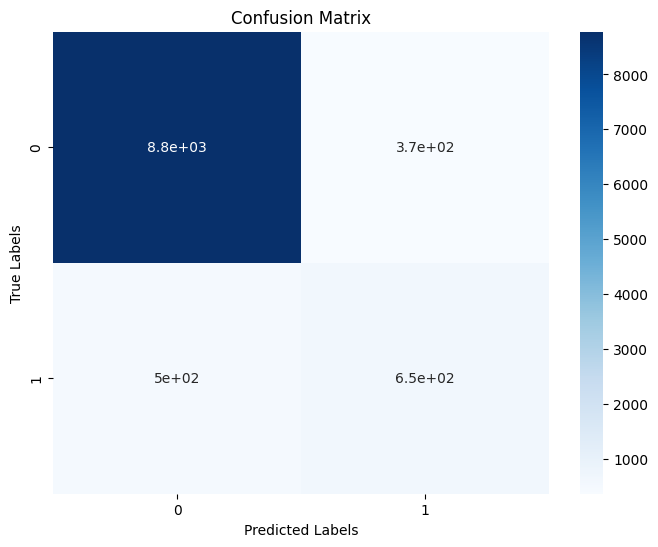

In [ ]:
# Print the classification report for the loaded model
classification_report = classification_report(y_test, y_test_pred)
print("Classification Report:")
print(classification_report)

# Plot the confusion matrix for the loaded model
confusion_matrix = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [ ]:
# import numpy as np
# from sklearn.metrics import confusion_matrix

# # Calculate the confusion matrix for the loaded model
# confusion_matrix = confusion_matrix(y_test, y_test_pred)

# # Define class labels
# labels = np.unique(y_test)

# # Print the confusion matrix
# print("Confusion Matrix:")
# for i, label in enumerate(labels):
#     row = confusion_matrix[i, :]
#     print(f"True {label}:", end=" ")
#     print("\t".join([str(count) for count in row]))

# # Calculate overall accuracy
# accuracy = np.trace(confusion_matrix) / np.sum(confusion_matrix)
# print("\nOverall Accuracy:", accuracy)

Confusion Matrix:
True 0: 8778	366
True 1: 500	653

Overall Accuracy: 0.915897834320676


### Decision tree-based bagging

In [ ]:
# Set up KFold cross-validation
kfold = model_selection.KFold(n_splits=3)

# Define the base estimator with tuned hyperparameters
base_estimator = DecisionTreeClassifier(min_samples_split=14, min_samples_leaf=29, max_depth=9, criterion='gini')

# Create the BaggingClassifier with tuned hyperparameters
model = BaggingClassifier(base_estimator=base_estimator, n_estimators=500)

# Create a SimpleImputer object with mean strategy
imputer = SimpleImputer(strategy='mean')

# Fit and transform the imputer on the training data
x_train_imputed = imputer.fit_transform(x_train)
x_test_imputed = imputer.transform(x_test)

# Fit the model and print the results
evaluate_classifier(model.fit(x_train_imputed, y_train), x_train_imputed, x_test_imputed, y_train, y_test)

Train accuracy: 0.9250267068078081
Test accuracy: 0.9198795765757016

Train ROC: 0.778662013885049
Test ROC: 0.7672979651394399

F-score: 0.6146660439047175
Precision: 0.6659919028340081
Recall: 0.5706851691240243


The results of the decision tree-based bagging model are really good. However, we will redo the modelling process using Random Forest to evaluate its performance.

### Random Forest Model

In [ ]:
# Create the RandomForestClassifier
rforest = RandomForestClassifier(random_state=0)

# Create a SimpleImputer object with mean strategy
imputer = SimpleImputer(strategy='mean')

# Fit and transform the imputer on the training data
x_train_imputed = imputer.fit_transform(x_train)
x_test_imputed = imputer.transform(x_test)

# Fit the model and print the results
evaluate_classifier(rforest.fit(x_train_imputed, y_train), x_train_imputed, x_test_imputed, y_train, y_test)

Train accuracy: 1.0
Test accuracy: 0.9147324463435952

Train ROC: 1.0
Test ROC: 0.7386298836994899

F-score: 0.5733722060252674
Precision: 0.6519337016574586
Recall: 0.5117085862966175


The current results are not satisfactory, as there is a noticeable disparity between the scores received during training and testing. To enhance the model's performance, it may be beneficial to adjust the hyperparameters of Random Forest.

We start by defining the params dictionary that contains the parameter grid for the randomized search. We create a RandomForestClassifier object with random_state=0 and perform the randomized search using RandomizedSearchCV. The best model is obtained from random_search.best_estimator_, and the best parameters and results are printed using the print statements and the classifier function.

### Tuning Hyperparameters of Random Forest

In [ ]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import RandomizedSearchCV
# from sklearn.impute import SimpleImputer

# Define the parameter grid
params = {
    'n_estimators': np.arange(100, 1000, 100),
    'max_depth': np.arange(3, 20, 1),
    'min_samples_split': np.arange(3, 20, 1),
    'min_samples_leaf': np.arange(3, 20, 1),
    'max_features': ['sqrt', 'log2'],
    'criterion': ['gini', 'entropy']
}

# Create the RandomForestClassifier
rforest = RandomForestClassifier(random_state=0)

# Create a SimpleImputer object with mean strategy
imputer = SimpleImputer(strategy='mean')

# Fit and transform the imputer on the training data
x_train_imputed = imputer.fit_transform(x_train)
x_test_imputed = imputer.transform(x_test)

# Perform randomized search
random_search = RandomizedSearchCV(estimator=rforest, param_distributions=params, scoring='roc_auc', cv=5)
random_search.fit(x_train_imputed, y_train)

# Get the best model
best_model = random_search.best_estimator_

# Print the best parameters and results
print("Best parameters are:", random_search.best_params_)
print()
print("Best estimator is:", random_search.best_estimator_)
print()
print("Scores and accuracies are:")
print()
evaluate_classifier(best_model, x_train_imputed, x_test_imputed, y_train, y_test)

Best parameters are: {'n_estimators': 400, 'min_samples_split': 3, 'min_samples_leaf': 5, 'max_features': 'sqrt', 'max_depth': 17, 'criterion': 'entropy'}

Best estimator is: RandomForestClassifier(criterion='entropy', max_depth=17, min_samples_leaf=5,
                       min_samples_split=3, n_estimators=400, random_state=0)

Scores and accuracies are:

Train accuracy: 0.9515392832863941
Test accuracy: 0.9178401476158105

Train ROC: 0.8260174413068001
Test ROC: 0.7248418671213368

F-score: 0.5648148148148148
Precision: 0.6940581542351454
Recall: 0.4761491760624458


In the above code, the missing values in x_train and x_test are handled using the SimpleImputer with a mean strategy. The imputed data is then used for the randomized search and fitting the RandomForestClassifier. Finally, the best parameters and results are printed using the print statements and the classifier function.

## Try a NN model?

## Results and Conclusion

After analyzing the outcomes of our three classifiers, it seems that the Bagging with Decision Tree model has the highest performance in terms of recall and ROC. Nonetheless, for a credit insurance issue, recall would be my preferred metric to consider because it is more important to correctly identify all the customers who are likely to default on their payments, even if it means having a higher false positive rate. Therefore, I recommend using the Bagging with Decision Tree model for predicting credit insurance defaults. It is important to note that further analysis could be done on the data to identify any potential biases or outliers that may affect the accuracy of the model.